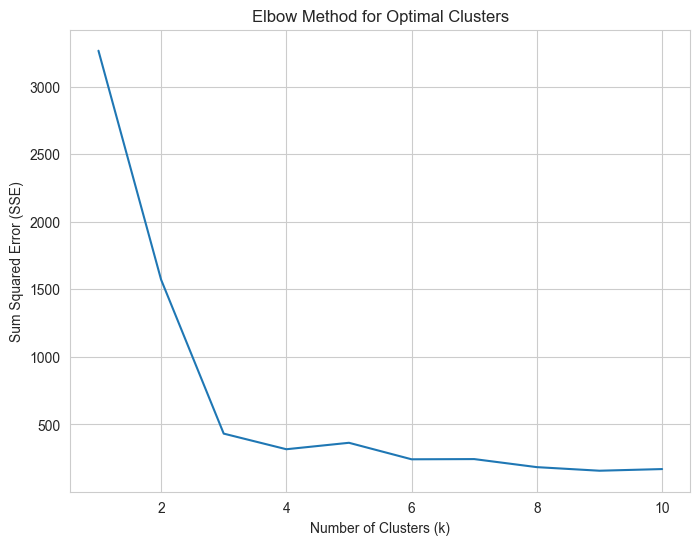

Silhouette Score: 0.705
Davies-Bouldin Index: 0.383


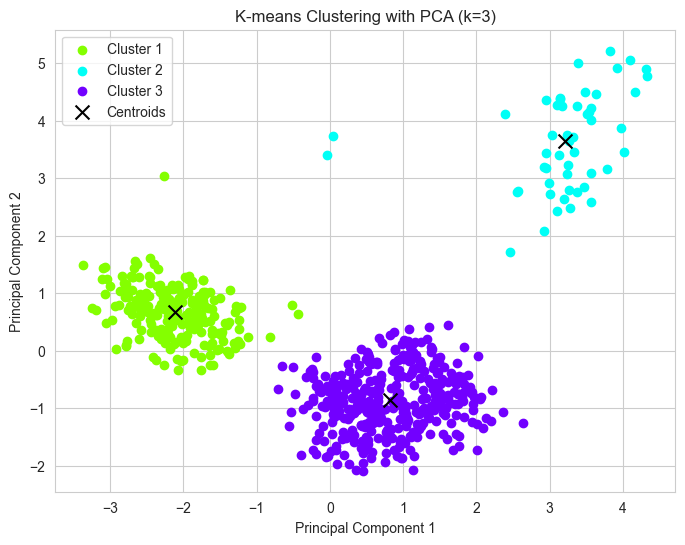

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load credit card customer dataset
file_path = 'sample_data/Credit_Card_Customer_Data.csv'  # Update this with the correct path
data = pd.read_csv(file_path)

# Step 1: Extract relevant features for clustering
X = data.select_dtypes(include=[np.number]).values  # Select only numeric columns

# Step 2: Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA (reduce to 2 components for visualization)
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X_scaled)

# Step 4: Elbow method to find the optimal number of clusters using manual K-means
def k_means_manual(X, k, max_iters=100):
    # Randomly initialize k centroids
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    
    for _ in range(max_iters):
        # Step 3: Assign each point to the closest centroid
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)  # Calculate distances to each centroid
        clusters = np.argmin(distances, axis=1)
        
        # Step 4: Recompute centroids based on current cluster assignments
        new_centroids = np.array([X[clusters == i].mean(axis=0) if len(X[clusters == i]) > 0 else centroids[i] for i in range(k)])
        
        # Step 5: Check convergence (if centroids don't change)
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    return centroids, clusters

# Step 5: Elbow method to find the optimal number of clusters
sse = []  # Sum of squared errors (inertia)
for k in range(1, 11):
    centroids, clusters = k_means_manual(X_pca, k)
    sse.append(np.sum([np.linalg.norm(X_pca[i] - centroids[clusters[i]])**2 for i in range(X_pca.shape[0])]))

# Plotting the elbow method
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.lineplot(x=range(1, 11), y=sse)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum Squared Error (SSE)")
plt.title("Elbow Method for Optimal Clusters")
plt.show()

# Step 6: Set number of clusters based on elbow plot (adjust as needed)
optimal_k = 3  # Adjust based on the elbow plot

# Step 7: Run the manual k-means algorithm with the optimal k
centroids, clusters = k_means_manual(X_pca, optimal_k)

# Step 8: Evaluate performance metrics
silhouette = silhouette_score(X_pca, clusters)
davies_bouldin = davies_bouldin_score(X_pca, clusters)

# Print performance metrics
print(f"Silhouette Score: {silhouette:.3f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.3f}")

# Step 9: Visualize the results (using PCA components for 2D plotting)
plt.figure(figsize=(8, 6))
colors = sns.color_palette("hsv", optimal_k)
for i in range(optimal_k):
    plt.scatter(X_pca[clusters == i, 0], X_pca[clusters == i, 1], color=colors[i], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=100, label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title(f'K-means Clustering with PCA (k={optimal_k})')
plt.show()
